In [4]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
all_ = pd.read_csv('All Categories.csv',encoding = "ISO-8859-1")
food = pd.read_csv('Food.csv', encoding = "ISO-8859-1")
tech = pd.read_csv('Technology.csv', encoding = "ISO-8859-1")

In [10]:
count = []
for i in all_['title']:
    l = i.split(' ')
    count.append(len(l))

In [12]:
all_['count'] = count

In [61]:
all_['count']

KeyError: 'count'

In [27]:
file = glob.glob('./*.csv')

In [28]:
file

['./All Categories.csv',
 './Education.csv',
 './Fashion.csv',
 './Food.csv',
 './Funny.csv',
 './Gaming.csv',
 './Movies.csv',
 './Music.csv',
 './News Report.csv',
 './Social Media.csv',
 './Sports.csv',
 './Startups.csv',
 './Technology.csv',
 './Travel.csv']

In [58]:
data_count = pd.DataFrame()
freq_word = pd.DataFrame()

for f in file:
    stopwords=['i','to','not','for','the','a','an','of','it','s','and','about','in','is','with','re','at','can','don','won','t',
          'because','well','more','then','from','all','nearly','no','has','have','unavailable']
    column = f[2:-4]
    title = pd.read_csv(f,encoding = "ISO-8859-1")['title']
    count = []
    for t in title:
        i = t.split(' ')
        count.append(len(i))
    data_count[column] = count
    freq = []
    for w in title:
        word_list = [y for y in ngrams([x for x in re.findall('[a-z0-9]+', w.lower()) if x not in stopwords], 3)]        
        freq.extend(word_list)
    freq_word[column] = pd.Series(freq).value_counts().index[:5]
    

In [97]:
ave_len = data_count.mean()

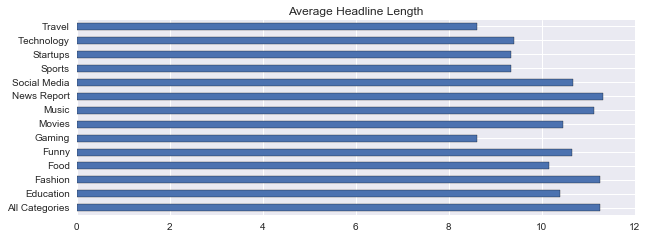

In [98]:
ave_len.plot(kind = 'barh',figsize = (10,3.5),title ='Average Headline Length')

In [92]:
filename = 'out.tex'
pdffile = 'out.pdf'
outname = 'out.png'

template = r'''\documentclass[preview]{{standalone}}
\usepackage{{booktabs}}
\begin{{document}}
{}
\end{{document}}
'''

with open(filename, 'wb') as f:
    f.write(template.format(freq_word.to_latex()))

subprocess.call(['pdflatex', filename])
subprocess.call(['convert', '-density', '300', pdffile, '-quality', '90', outname])

TypeError: a bytes-like object is required, not 'str'

In [59]:
freq_word

,All Categories,Education,Fashion,Food,Funny,Gaming,Movies,Music,News Report,Social Media,Sports,Startups,Technology,Travel
0,"(biggest, 70, years)","(male, birth, control)","(lee, sung, kyung)","(health, care, bill)","(will, make, you)","(update, dota, 2)","(la, la, land)","(vampire, diaries, series)","(supermoon, biggest, 70)","(attention, required, cloudflare)","(green, bay, packers)","(markets, right, now)","(monsanto, on, labels)","(update, dota, 2)"
1,"(we, see, record)","(found, preserved, amber)","(your, mental, health)","(will, make, you)","(memes, that, will)","(mass, effect, andromeda)","(things, binge, watch)","(diaries, series, finale)","(see, record, breaking)","(saturday, night, live)","(bay, packers, official)","(right, now, us)","(cozy, clothes, may)","(mass, effect, andromeda)"
2,"(breaking, supermoon, biggest)","(on, climate, change)","(comes, out, as)","(that, will, make)","(we, guess, your)","(zelda, breath, wild)","(5, things, binge)","(13, reasons, why)","(record, breaking, supermoon)","(will, make, you)","(packers, official, blog)","(now, us, stocks)","(foe, ajit, pai)","(zelda, breath, wild)"
3,"(see, record, breaking)","(dakota, access, pipeline)","(nam, joo, hyuk)","(gop, health, care)","(via, different, client)","(xbox, one, pc)","(saturday, night, live)","(on, apple, music)","(biggest, 70, years)","(bunch, dies, 82)","(as, new, coach)","(30, year, mortgage)","(viral, just, watch)","(xbox, one, pc)"
4,"(supermoon, biggest, 70)","(dinosaur, tail, found)","(brock, lesnar, vs)","(ll, guess, your)","(remarks, quits, breitbart)","(sleeping, dogs, movie)","(things, you, should)","(rock, n, roll)","(breaking, supermoon, biggest)","(brady, bunch, dies)","(back, 112, 105)","(year, mortgage, rate)","(new, jersey, pipeline)","(sleeping, dogs, movie)"


In [6]:
from nltk.util import ngrams
from nltk.corpus import stopwords
import re

In [21]:
stopwords=['i','to','not','for','the','a','an','of','it','s','and','about','in','is','with','re','can','we','don','won','t',
          'because','well','more','then','from','all','nearly','no','has','have']
def get_word_stats(txt_series, n, rem_stops=False):
    stopwords=['i','to','not','for','the','a','an','of','it','s','and','about','in','is','with','re','can','we','don','won','t',
          'because','well','more','then','from','all','nearly','no','has','have']
    txt_words = []
    txt_len = []
    for w in txt_series:
        word_list = [x for x in ngrams(re.findall('[a-z0-9]+', w.lower()), n)]
        word_list = [y for y in ngrams([x for x in re.findall('[a-z0-9]+', w.lower()) if x not in stopwords], n)]
        word_list_len = len(list(word_list))
        txt_words.extend(word_list)
        txt_len.append(word_list_len)
    return pd.Series(txt_words).value_counts().to_frame('count'),pd.DataFrame(txt_len, columns=['count'])

In [30]:
hw_all,hl_all = get_word_stats(all_['title'], 2, 0)
hw_food,hl_food = get_word_stats(food['title'], 2, 0)
hw_tech,hl_tech = get_word_stats(tech['title'], 2, 0)
hw_tech

,count
"(climate, change)",6
"(self, driving)",4
"(new, jersey)",3
"(may, be)",3
"(social, media)",3
"(space, station)",2
"(driving, cars)",2
"(beer, yoga)",2
"(elon, musk)",2
"(earth, size)",2


In [48]:
hw_all

,count
"(donald, trump)",11
"(record, breaking)",4
"(70, years)",4
"(see, record)",4
"(supermoon, biggest)",4
"(breaking, supermoon)",4
"(biggest, 70)",4
"(year, old)",3
"(packers, official)",3
"(bay, packers)",3


In [64]:
w = all_['title'][0]
w_l = [x for x in ngrams(re.findall('[a-z0-9]+', w.lower()), 2)]

In [65]:
w_l

[('rejoice', 'in'),
 ('in', 'the'),
 ('the', 'success'),
 ('success', 'of'),
 ('of', 'logan'),
 ('logan', 'it'),
 ('it', 'means'),
 ('means', 'grittier'),
 ('grittier', 'comic'),
 ('comic', 'book'),
 ('book', 'movies'),
 ('movies', 'are'),
 ('are', 'coming')]